In [1]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [49]:
df = yf.download('AAPL', start='2012-01-01', end='2024-07-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416985,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754258,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400
...,...,...,...,...,...,...
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600
2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200


In [50]:
df.shape

(3153, 6)

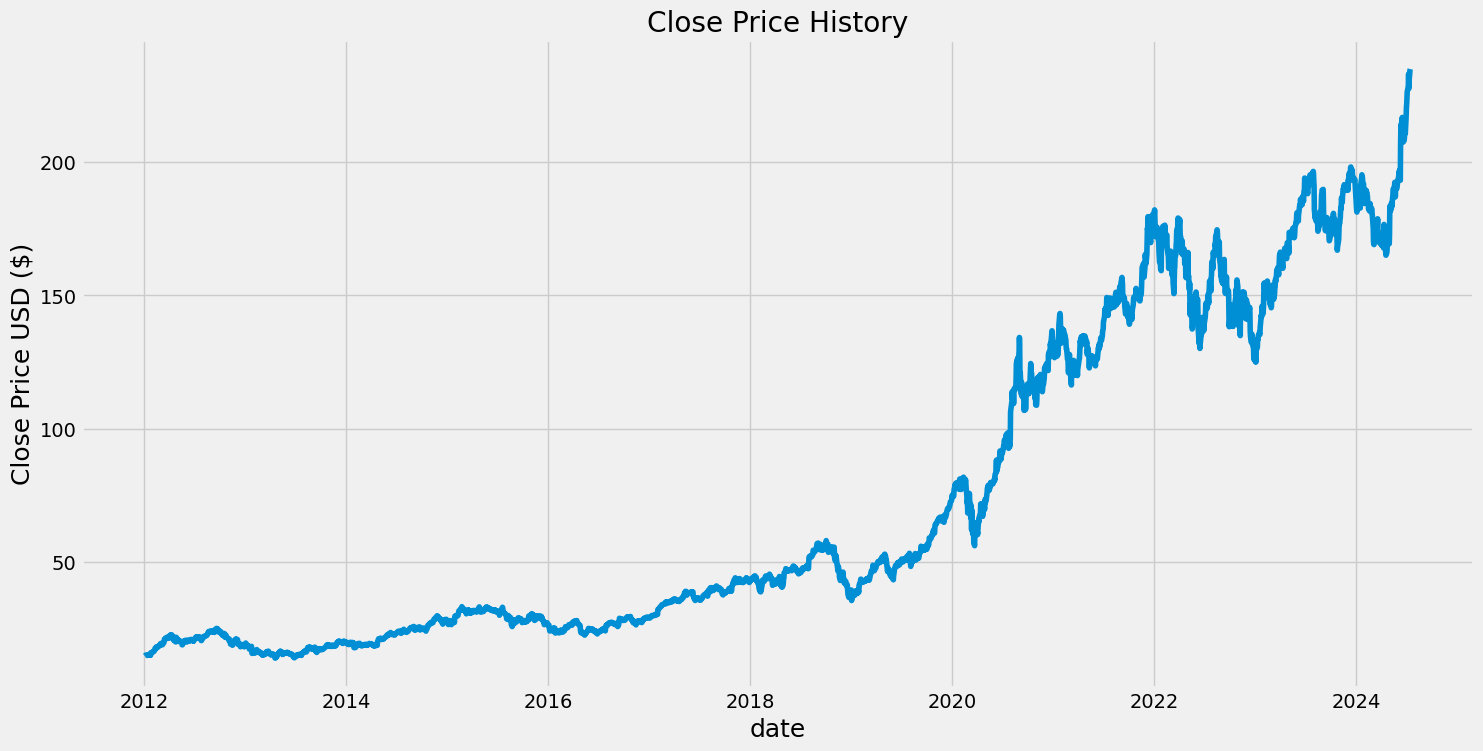

In [51]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [52]:
data=df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2523

In [53]:
dataset.shape

(3153, 1)

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.98062224],
       [0.99809839],
       [1.        ]])

In [55]:
train_data=scaled_data[0:training_data_len, :]
X_train= []
Y_train=[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    Y_train.append(train_data[i,0])
    if i<=61:
        print(X_train)
        print(Y_train)
        print()

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [56]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [57]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2463, 60, 1)

In [58]:
#lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
model.fit(X_train, Y_train, batch_size=1, epochs=1)

2463/2463 [==============================] - 79s 31ms/step - loss: 6.0368e-04


In [61]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
Y_test = dataset[training_data_len:,: ]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [62]:
X_test = np.array(X_test)

In [63]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [64]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 1s 21ms/step


In [65]:
rmse = np.sqrt(np.mean(predictions - Y_test)**2)
rmse

2.243622855534629

C:\Users\brigh\AppData\Local\Temp\ipykernel_16028\4258462777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

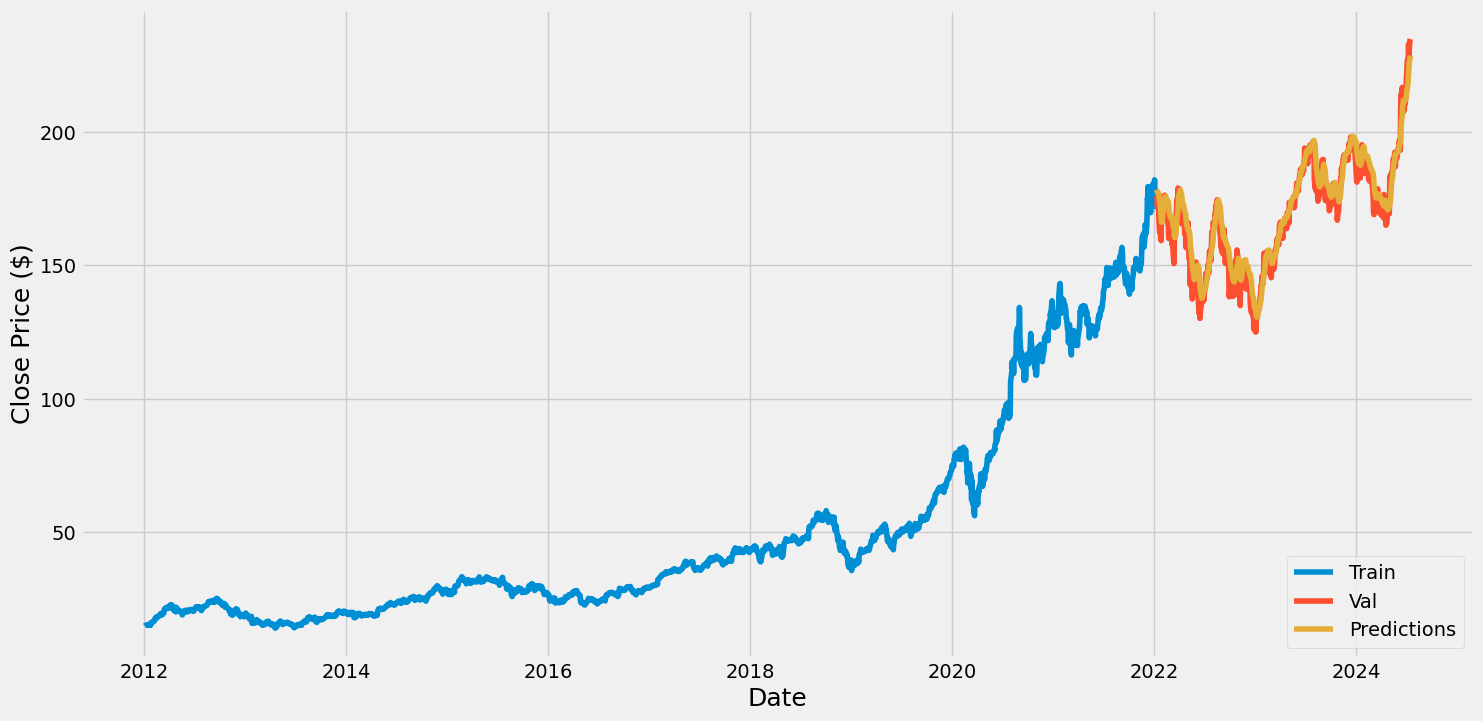

In [66]:
train = data[:training_data_len]
valid = data[ training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [67]:
valid

,Close,Predictions
Date,,
2022-01-11,175.080002,178.370911
2022-01-12,175.529999,177.876068
2022-01-13,172.190002,177.679825
2022-01-14,173.070007,177.264282
2022-01-18,169.800003,176.916031
...,...,...
2024-07-10,232.979996,222.293533
2024-07-11,227.570007,224.524063
2024-07-12,230.539993,225.944199


In [68]:
#quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-07-17')

#new data frame
new_df = apple_quote.filter(['Close'])

#last 60-day closing price-array
last_60_days = new_df[-60:].values

#scale the data 0-1
last_60_days_scaled = scaler.transform(last_60_days)

#empty array
X_test = []

#append
X_test.append(last_60_days_scaled)

#convert
X_test = np.array(X_test)

#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#get prediction
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 23ms/step
[[230.06364]]


In [69]:
apple_quote2 = yf.download('AAPL', start='2024-07-18', end='2024-07-19')
apple_quote2['Close']

[*********************100%%**********************]  1 of 1 completed


Date
2024-07-18    223.809998
Name: Close, dtype: float64